In [1]:
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
data=sb.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


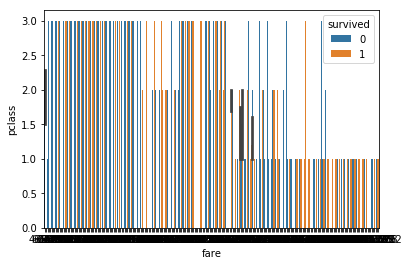

In [4]:
sb.barplot(data.fare,data.pclass,hue=data.survived)

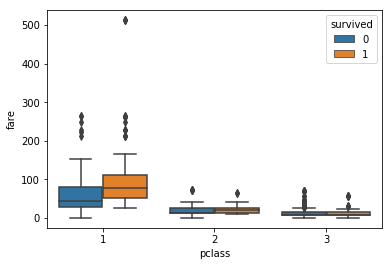

In [5]:
sb.boxplot(data.pclass,data.fare,hue=data.survived)

In [6]:
data.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [7]:
fare_sor=data.fare.copy()

In [8]:
fare_sor=fare_sor.sort_values(ascending=True)

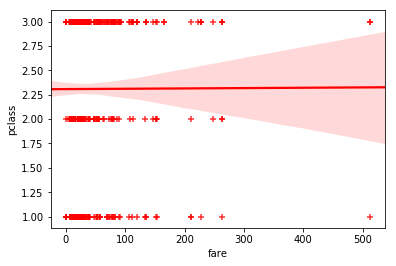

In [9]:
sb.regplot(fare_sor,data.pclass,color='r',marker='+')

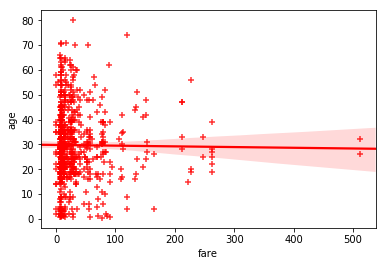

In [10]:

sb.regplot(fare_sor,data.age,color='r',marker='+')

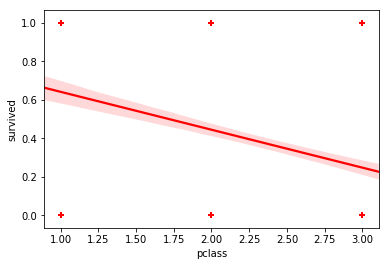

In [11]:
sb.regplot(data.pclass,data.survived,color='r',marker='+')

In [12]:
trd=[]
scd=[]
frt=[]
for i,value in zip(data.pclass,data.fare):
    #print(i,value)
   
    if i == 3:
        trd.append(value)
    elif i ==2:
        scd.append(value)
        
    else:
        frt.append(value)
print(len(trd),'+',min(trd),'+',max(trd))
print(len(scd),'+',min(scd),'+',max(scd))
print(len(frt),'+',min(frt),'+',max(frt))


491 + 0.0 + 69.55
184 + 0.0 + 73.5
216 + 0.0 + 512.3292


In [13]:
cld=[]
mld=[]
ald=[]
for i in data.age:
    #print(i,value)
   
    if i <= 11:
        cld.append(i)
    elif(i <11) or (i<=30):
        mld.append(i)
        #print(i)
    else:
        ald.append(i)


In [14]:
print(len(cld),'+',min(cld),'+',max(cld))
print(len(mld),'+',min(mld),'+',max(mld))
print(len(ald),'+',min(ald),'+',max(ald))

68 + 0.42 + 11.0
341 + 12.0 + 30.0
482 + 30.5 + 80.0


In [15]:
bins=[0,11,21,34,51,80]
grp_by=[0,1,2,3,4]
age_cat=pd.cut(data.age,bins,labels=grp_by)

In [16]:
data['age_cat']=age_cat

In [17]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [18]:
bins=[0,11,21,34,51,100]
grp_by=[0,1,2,3,4]
fare_cat=pd.cut(data.fare,bins,labels=grp_by)
data['fare_cat']=fare_cat

In [19]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,fare_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3,0


In [20]:
data.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

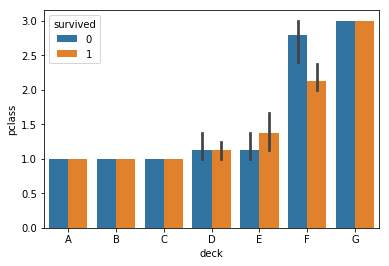

In [21]:
sb.barplot(data.deck,data.pclass,hue=data.survived)

In [22]:
data=data.drop(['who','adult_male','class','embark_town','alive','alone'],axis=1)

In [23]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_cat,fare_cat
0,0,3,male,22.0,1,0,7.2500,S,NaN,2,0
1,1,1,female,38.0,1,0,71.2833,C,C,3,4
2,1,3,female,26.0,0,0,7.9250,S,NaN,2,0
3,1,1,female,35.0,1,0,53.1000,S,C,3,4
4,0,3,male,35.0,0,0,8.0500,S,NaN,3,0


In [24]:
for i in data['sex']:
    if i =='male':
        data['sex']=0
    else :
        data['sex']=1

In [25]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_cat,fare_cat
0,0,3,0,22.0,1,0,7.2500,S,NaN,2,0
1,1,1,0,38.0,1,0,71.2833,C,C,3,4
2,1,3,0,26.0,0,0,7.9250,S,NaN,2,0
3,1,1,0,35.0,1,0,53.1000,S,C,3,4
4,0,3,0,35.0,0,0,8.0500,S,NaN,3,0


In [26]:
train=data.drop(['survived'],axis=1)
test=data['survived']

In [27]:
train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,deck,age_cat,fare_cat
0,3,0,22.0,1,0,7.2500,S,NaN,2,0
1,1,0,38.0,1,0,71.2833,C,C,3,4
2,3,0,26.0,0,0,7.9250,S,NaN,2,0
3,1,0,35.0,1,0,53.1000,S,C,3,4
4,3,0,35.0,0,0,8.0500,S,NaN,3,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x,y=train_test_split(train,test_size=0.3,random_state=24)

In [30]:
todummy=['embarked','deck']

In [31]:
for x in todummy:
    dummies=pd.get_dummies(train[x],prefix=x)
    train=train.drop(x,1)
    train=pd.concat([train,dummies],axis=1)
            

In [32]:
train.head()

,pclass,sex,age,sibsp,parch,fare,age_cat,fare_cat,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,3,0,22.0,1,0,7.2500,2,0,0,0,1,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,3,4,1,0,0,0,0,1,0,0,0,0
2,3,0,26.0,0,0,7.9250,2,0,0,0,1,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,3,4,0,0,1,0,0,1,0,0,0,0
4,3,0,35.0,0,0,8.0500,3,0,0,0,1,0,0,0,0,0,0,0


In [33]:
train=train.drop(['age','fare'],axis=1)

In [34]:
train=train.fillna(method='bfill')

In [35]:
from sklearn.linear_model import LogisticRegression
log_res=LogisticRegression()
log_res.fit(train,test)

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_res,train,test,cv=5,scoring='accuracy')

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

array([0.60335196, 0.67039106, 0.69662921, 0.71910112, 0.74011299])

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_cls=SGDClassifier(random_state=43,tol=1e-3,max_iter=500)

In [38]:
sgd_cls.fit(train,test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=500,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=43, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
cross_val_score(sgd_cls,train,test)

/home/vasim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.61279461, 0.70707071, 0.74410774])